In [15]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [10]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/publico.csv')

In [11]:
data = data.drop('ID',axis=1) #delete ID column

In [13]:
print(data) #view data

     Edad Género  Ingresos (USD)     Educación   Ocupación Tipo de Público
0      23      F           32000  Licenciatura  Estudiante    Joven Adulto
1      45      M           80000      Posgrado     Gerente     Profesional
2      34      F           50000  Licenciatura  Diseñadora     Profesional
3      29      M           40000       Técnico     Técnico    Joven Adulto
4      52      F          120000      Posgrado   Directora      Alto Nivel
..    ...    ...             ...           ...         ...             ...
195    28      M           41000       Técnico     Técnico    Joven Adulto
196    54      F          118000      Posgrado   Directora      Alto Nivel
197    41      M           64000  Licenciatura   Ingeniero     Profesional
198    39      F           47000  Licenciatura     Maestra     Profesional
199    23      M           31000       Técnico  Estudiante    Joven Adulto

[200 rows x 6 columns]


In [14]:
#Convert categorical variables into numeric (Encoding)
encoder = LabelEncoder()

encodedDf = data.copy()

for column in ['Género','Educación','Ocupación','Tipo de Público']:
  encodedDf[column] = encoder.fit_transform(encodedDf[column])

print(encodedDf)

     Edad  Género  Ingresos (USD)  Educación  Ocupación  Tipo de Público
0      23       0           32000          1         11                1
1      45       1           80000          2         12                2
2      34       0           50000          1          7                2
3      29       1           40000          3         18                1
4      52       0          120000          2          6                0
..    ...     ...             ...        ...        ...              ...
195    28       1           41000          3         18                1
196    54       0          118000          2          6                0
197    41       1           64000          1         13                2
198    39       0           47000          1         15                2
199    23       1           31000          3         11                1

[200 rows x 6 columns]


In [16]:
#set variables X,Y
x = encodedDf.drop('Tipo de Público',axis=1)
y = encodedDf['Tipo de Público']

In [17]:
#Scale data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
#Train and test data
X_train,X_test,y_train,y_test = train_test_split(
      x_scaled,
      y,
      random_state=42,
      test_size=0.2
    )

In [20]:
#Define model
treeClassifier = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [21]:
#Train model
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
#Make prediction
y_predict = treeClassifier.predict(X_test)

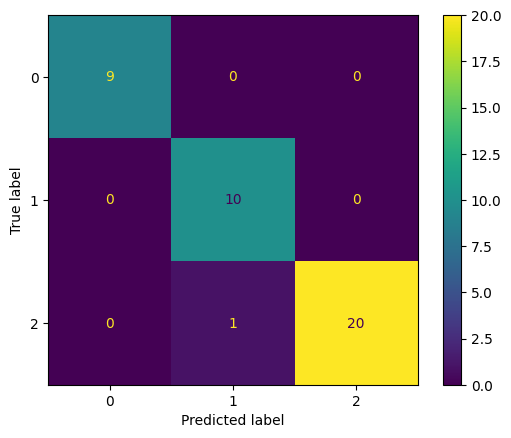

In [26]:
#Check confussion matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

In [27]:
#Check Accuracy Score
accuracy_score(y_test,y_predict)

0.975